In [9]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plot characteristics
title_font_size = 50
font_size = 12
tick_size = 10
plt.rc('figure', titlesize = title_font_size)
plt.rc('axes', labelsize = font_size)
plt.rc('axes', titlesize = font_size)
plt.rc('xtick', labelsize = tick_size)
plt.rc('ytick', labelsize = tick_size)

# What is... Linear Regression?

!["Endless Possibilities"](https://images.unsplash.com/photo-1583990994634-8f6db946236a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=800&q=80)
*Fig. 1: Learning linear regression unlocks the potential to learn more complicated techniques and concepts.*

When I asked my mentor how to prepare for data science interviews, he recommended that I focus on understanding various machine learning models, the first of which being the linear regression algorithm. It makes sense that he’d recommend me to do so. Many data scientists and machine learning engineers regard this algorithm as the first step towards becoming a professional in the field. It serves as the base for which we can develop a deeper understanding for more complex models.

## Describe Linear Regression. 
But, what actually is it? From Wikipedia, we see that the algorithm entails, “a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)”. In other words, **the linear regression algorithm simply uses a line to model two variables: the independent and dependent variables**. From this, we can then make predictions for future observations. 

How does it look like mathematically? Think back to your high school algebra teacher, and recall that one lesson he or she was talking about the equation of a line. You’ll see that the equation of a line looks like this: 

$$Y = mX + b$$ 

Now, this is what the linear regression model looks like: 

$$Y = \beta_0 + \beta_1*X$$ 

Here:
- $Y$ is the dependent variable. This is the variable we are trying to predict.
- $\beta_0$ is the slope intercept. If there were no value for $X$ i.e. $X = 0$, then $Y$ would be this number.
- $\beta_1$ is the slope coefficient. For every unit increase in $X$, $Y$ is changed by this much.
- $X$ is the independent variable. This is the variable that helps us predict $Y$.

Notice that it’s the exact same formula because the model itself is a line, it's just the variables are different. So in the graph above, that blue line we see can be modelled using the equation of a line.

There could be many values for $\beta_0$ and $\beta_1$. However, we are only interested in the values that give us the line that best fits the data.
With this in mind, we can see that the linear regression algorithm attempts to **find the line that best fits the data by optimizing the coefficients $\beta_0$ and $\beta_1$**.

Of course, there are still many other questions to answer. How do I get the best values? Can there be more variables? When and how can I use it? Why should I use it? I will go more in-depth into these questions below, starting with when to use it. 

The best way to explain any new concept is through examples. Suppose we have a [dataset](https://github.com/FeezyHendrix/LinearRegressionfromscrath) containing the size of a person’s head and the weight of their brain, and we want to predict a new person’s brain weight given their head size. We can do this using linear regression, where the independent variable is brain weight and dependent variable is head size. I'll keep referring back to this example to make it easier to explain concepts.

## When would you use it?
### Assumptions
There are several assumptions we must keep track of when using linear regression. These are:

- **Normality**

We assume that all variables are normally distributed. This helps us use other statistical methods in the future. 

- **Linearity**

Linearity is as it sounds: we assume there is a linear relationship between the predictor variable and response variable.
This isn’t always the case with real data, but regardless, linear regression can still be as effective as other more complex models.

- **Constant variance of the residuals**

Recall that variance refers to the measurement of spread between numbers, and that residuals are calculated as the actual value minus the predicted value i.e. the error.
So, we assume that the variance in the errors of the response variables stays relatively the same throughout all values of each of the predictor variables. 

In other words, no matter the value for head size, we get the same spread in errors for brain weight. This is called *homoscedasticity*.

Why is this important? 

Let’s think of what happens when this isn’t the case, which is called heteroscedasticity. It would be difficult to create a regression model when heteroscedasticity is present, as there’d be great variety in the independent variable. A cone shape would form from plotting this independent variable and this cone shape would make it difficult to fit a line.

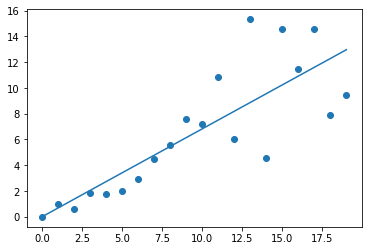

In [67]:
np.random.seed(1)
X = np.arange(20)
Y = [x * 0.3 + np.random.rand(1) * x for x in range(20)]  
plt.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m * X + b)

plt.show()

*Fig. 1: A model will have difficulty fitting to this data. Leftmost values on the X-axis vary far less than those on the rightmost end, and so the line will have trouble adjusting to correctly capture those values on the rightmost end.*


- **Little to no multicollinearity**

Multicollinearity is the idea that predictor variables are correlated with each other. We assume that there exists little to no correlation between the predictor variables, meaning that one person’s head size does not affect another’s.

Personally, I use this algorithm as a baseline to compare other models to. For example, if I were to predict housing prices, I would start off by using a linear regression model to predict prices, even though it’s not reasonable to assume that the data itself is linear. If the linear regression model performs just as well as some other, more complex model, then why would you use more complicated models if the simplest one performs just as well?

## How do you find the optimize the coefficients?
### Cost Function

Recall again that the linear regression model for this example looks like: 

**Brain weight** = $\beta_0 + \beta_1 * $ **Head size** 

Let’s visualize what this line of best fit would look like in our dataset:

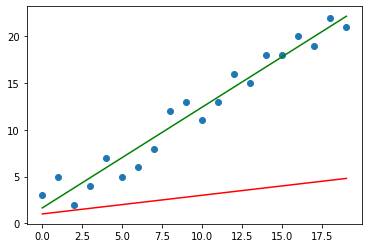

In [96]:
np.random.seed(1)
X = np.arange(20)
Y = [np.random.randint(5) + x for x in range(20)]  
plt.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m * X + b, color = 'g')
plt.plot(X, 0.2 * X + 1, color = 'r')

plt.show()

In order to find the line of best fit, we need to come up with the best values for $\beta_0$ and $\beta_1$. How would we do this?